<a href="https://colab.research.google.com/github/NUELBUNDI/PDS_PROJECT/blob/main/Final_Project_Lee_Bundi_102586.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels
import missingno as mn

In [234]:
# Read the Data_csv files to  Pandas dataframes
df1 = pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/PDS_PROJECT/main/kpmgcustomerdemograph.csv')
df = pd.read_csv("https://raw.githubusercontent.com/NUELBUNDI/PDS_PROJECT/main/kmpgcustomerpurchasedetails.csv")

In [235]:
# Obtain the No of Columns
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [236]:
#Read the First 5 rows including the rows
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02-12-12
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03-03-14
2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20-07-99
3,4,88,3135,31-08-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16-12-98
4,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10-08-15


In [237]:
# Read the second 
df1.head(2)

,customer_id,customer_id.1,state,States,Country,property_valuation,name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256
0,34,833 Luster Way,4005,QLD,Australia,8,Jephthah Bachmann,U,59,Legal Assistant,IT,Affluent Customer,N,No,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144,22 Oxford Junction,2315,New South Wales,Australia,3,Jory Barrabeale,U,71,Environmental Tech,IT,Mass Customer,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
# Drop Columns with Unamed.
df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df1.columns


Index(['customer_id', 'customer_id.1', 'state', 'States', 'Country',
       'property_valuation', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [258]:
combinedf=pd.merge(df,df1,on='customer_id',how='left')
combinedf.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,customer_id.1,state,States,Country,property_valuation,name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02-12-12,984 Hoepker Court,3064.0,VIC,Australia,6.0,Kristos Anthony,Male,19.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03-03-14,4 Shopko Circle,2196.0,NSW,Australia,5.0,Lauree O'Donnell,Female,89.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20-07-99,586 Miller Parkway,2835.0,NSW,Australia,1.0,Berne Donegan,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0


In [240]:
# no of rows x columns
combinedf.shape

(20000, 27)

In [241]:
# change the name of variable combinedf

data=combinedf

In [242]:
# Percentage of Null values and datatypes per column.

df_dtype=data.dtypes
df_missing= data.isna().mean().round(4)*100

details_1=pd.DataFrame(df_missing,columns=["Missing"])
details_2=pd.DataFrame(df_dtype,columns=['Dtype'])

combine_details=pd.concat([details_1,details_2],axis=1)
combine_details.sort_values(by='Missing',ascending=False)


# The percentage of the missing data in the below columns is insignificant we will drop them as the need arises.

,Missing,Dtype
job_industry_category,16.16,object
job_title,11.98,object
tenure,2.24,float64
online_order,1.80,object
product_size,0.98,object
product_first_sold_date,0.98,object
standard_cost,0.98,object
product_class,0.98,object
product_line,0.98,object
brand,0.98,object


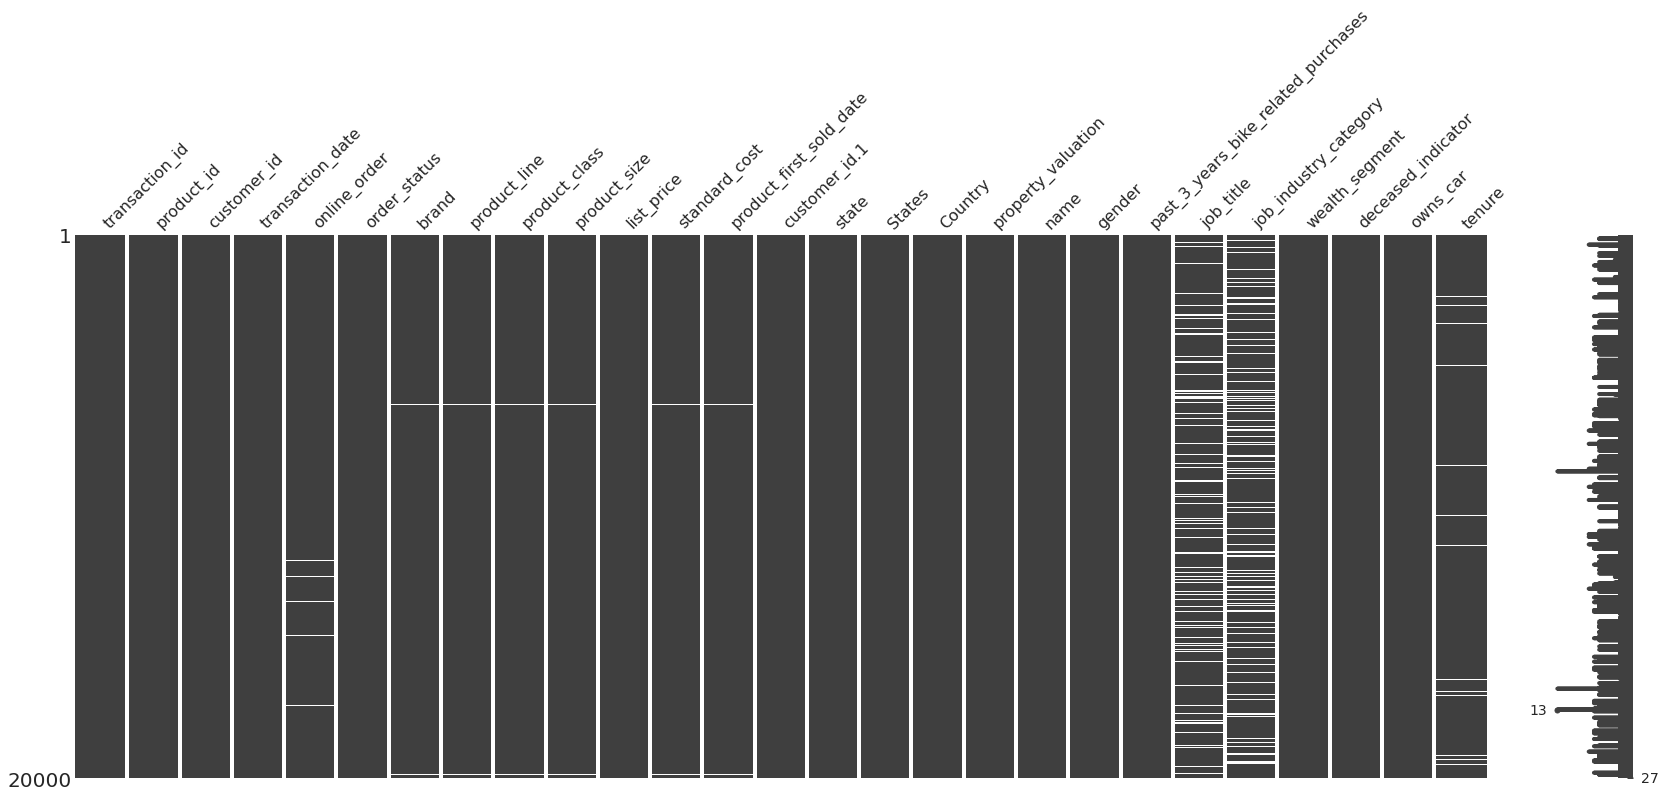

In [243]:
# Plot presentation of the missing values
mn.matrix(data)

In [244]:
# Convert standard cost to float  and remove $ sign

def convert(x):
  if isinstance(x, str):
    return(x.replace('$', '').replace(',', ''))
  return(x)
  
# Apply the function.

data['standard_cost']=data['standard_cost'].apply(convert).astype('float')
data['standard_cost'].head(3)

0     53.62
1    388.92
2    248.82
Name: standard_cost, dtype: float64

In [245]:
# convert the date to pandas data+frame

data['transaction_date']=pd.to_datetime(data['transaction_date'])
data['product_first_sold_date']=pd.to_datetime(data['product_first_sold_date'])

## **Exploratory Data Analysis**

In [246]:
data.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,state,property_valuation,past_3_years_bike_related_purchases,tenure
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000,19997.000000,19997.000000,19997.000000,19551.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,556.046951,2983.290644,7.505476,48.772466,10.683239
std,5773.647028,30.75359,1011.951046,582.825242,405.955660,858.253057,2.837189,28.598250,5.676403
min,1.000000,0.00000,1.000000,12.010000,7.210000,0.000000,0.000000,0.000000,1.000000
25%,5000.750000,18.00000,857.750000,575.270000,215.140000,2200.000000,6.000000,24.000000,6.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,507.580000,2767.000000,8.000000,48.000000,11.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,795.100000,3752.000000,10.000000,73.000000,15.000000
max,20000.000000,100.00000,5034.000000,2091.470000,1759.850000,4883.000000,12.000000,99.000000,22.000000


Approved Orders:  19821
Cancelled Order :  179


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


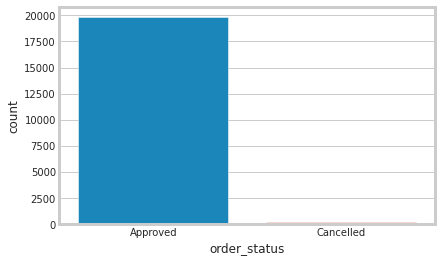

In [247]:
# count the canceled orders then drop them
# print(data['order_status'].value_counts())
# data['order_status'].value_counts().plot.barh()

ax = sns.countplot(data['order_status'],label="Count")      
B, M = data['order_status'].value_counts()
print('Approved Orders: ',B)
print('Cancelled Order : ',M)

In [248]:
# drop cancelled orders in our data

data.drop(data[data['order_status']=='Cancelled'].index,inplace=True)
# check if dropped
data.order_status.unique()

array(['Approved'], dtype=object)

In [249]:
# import random
# topdf = data.groupby('product_id')['list_price'].sum()[:20].reset_index(name='counts')
# n = topdf['product_id'].unique().__len__()+1
# all_colors = list(plt.cm.colors.cnames.keys())
# random.seed(100)
# c = random.choices(all_colors, k=n)

# # Plot Bars
# plt.figure(figsize=(8,8))
# plt.bar(topdf['product_id'], topdf['counts'], color=c, width=.5)
# for i, val in enumerate(topdf['counts'].values):
#     plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# # Decoration
# plt.gca().set_xticklabels(df['product_id'], rotation=60, horizontalalignment= 'right')
# plt.title("Number of Vehicles by Manaufacturers", fontsize=8)
# plt.ylabel('# Vehicles')
# plt.ylim(0, 45)
# plt.show()

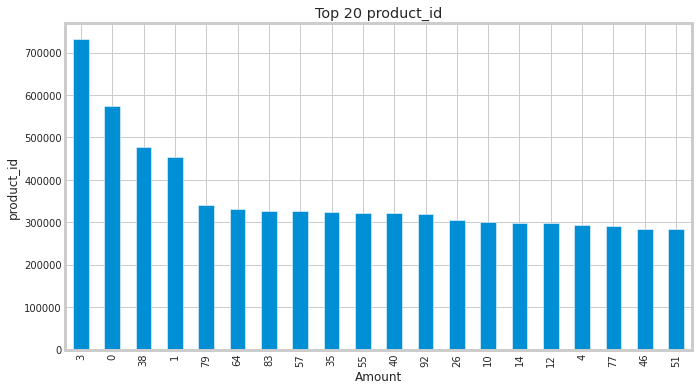

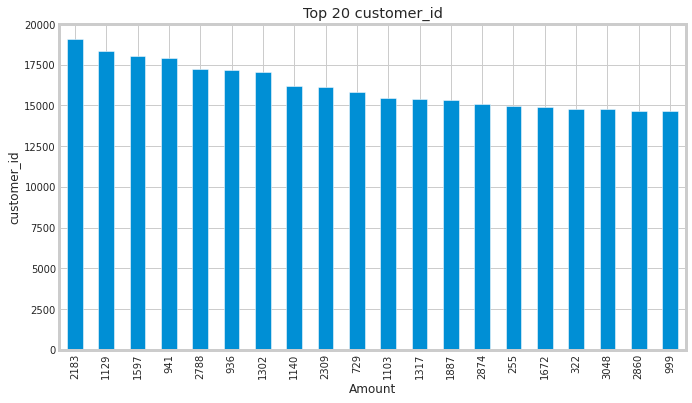

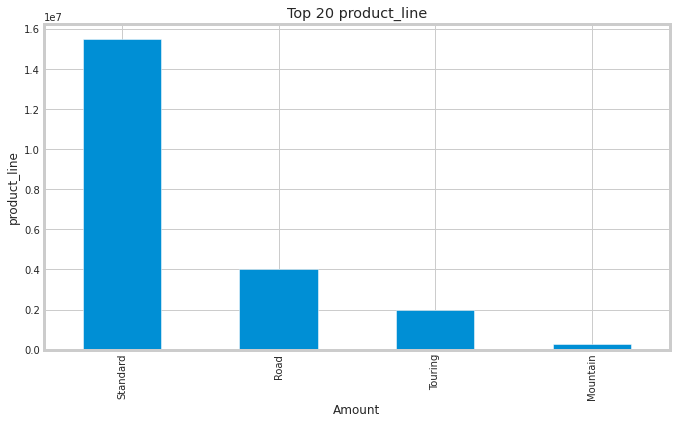

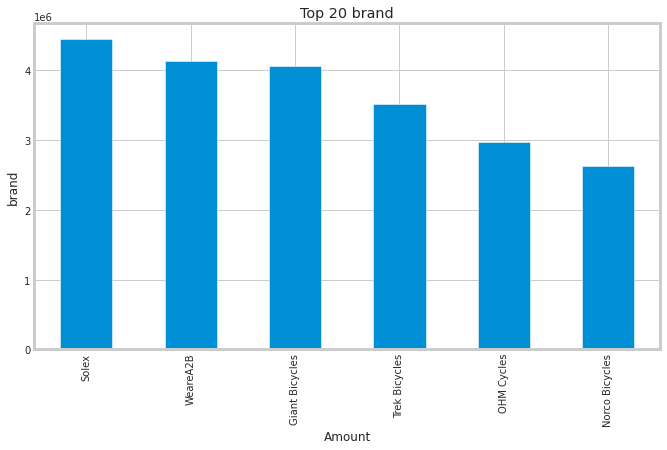

In [250]:
# create a function to plot bar graphs for top 20 elements
def plottop20(x):
  top20=data.groupby(x)['list_price'].sum().sort_values(ascending=False)[:20]
  top20.reset_index()
  plt.figure(figsize=(10,6))
  top20.plot.bar()
  plt.title(f'Top 20 {x}')
  plt.xlabel('Amount')
  plt.ylabel(f'{x}')
  return plt.show()

column=['product_id','customer_id','product_line','brand']

for col in column:
  plottop20(col) 




In [251]:
# drop cancelled orders in our data

data.drop(data[data['order_status']=='Cancelled'].index,inplace=True)
# check if dropped
data.order_status.unique()

array(['Approved'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


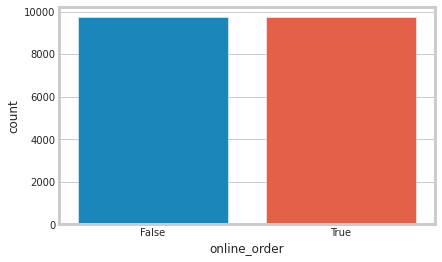

In [252]:
# Online Payments True and Offline Payments
sns.countplot(data['online_order'])

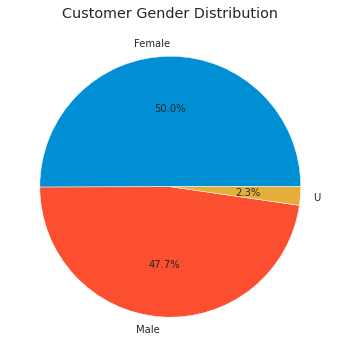

In [253]:
x=data['gender'].value_counts().sort_values(ascending =False)
x.reset_index()
x.keys()
plt.figure(figsize=(8,6))
plt.pie(x=data['gender'].value_counts(),labels=x.keys(),autopct='%1.1f%%')
plt.title('Customer Gender Distribution')
plt.show()

## **Analysis Data Datewise**





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


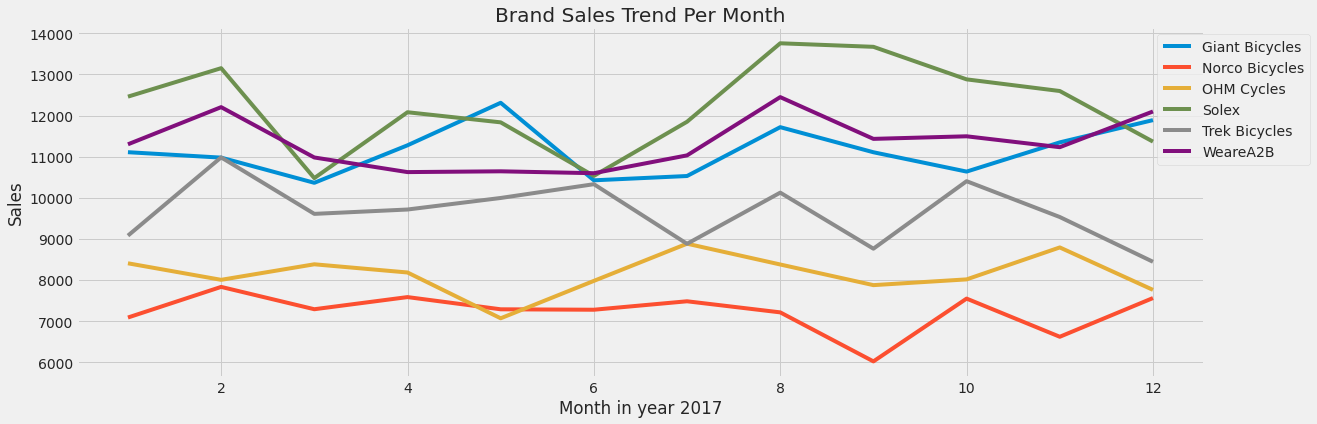

In [254]:
# Prepare the data
data_date=data.groupby(['transaction_date','brand']).agg({'list_price':'sum'})
data_date=data_date.reset_index()
data_date.columns=['date','brand','price']
data_date['month']=data_date['date'].dt.month

# Plot the data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,6))
lp=sns.lineplot('month', 'price', ci=None, 
             hue='brand', data=data_date)
lp.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('Brand Sales Trend Per Month')
plt.xlabel('Month in year 2017')
plt.ylabel('Sales')
plt.show()


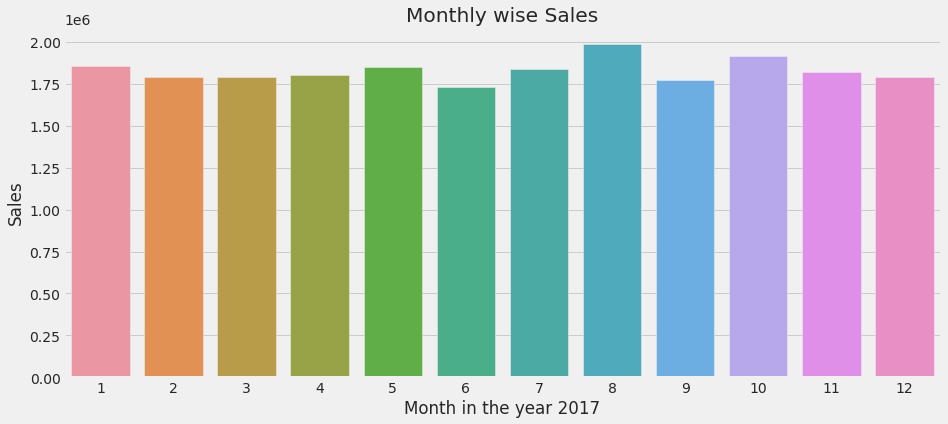

In [255]:
data['date_month']=data['transaction_date'].dt.month
data_sales_month=data.groupby('date_month').agg({'list_price':np.sum})
plt.figure(figsize=(14,6))
sns.barplot(x=data_sales_month.index,y=data_sales_month.list_price)
plt.title('Monthly wise Sales')
plt.xlabel('Month in the year 2017')
plt.ylabel('Sales')
plt.show()

In [256]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,02-12-12
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,03-03-14
2,3,37,402,16-10-17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,20-07-99
3,4,88,3135,31-08-17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,16-12-98
4,5,78,787,01-10-17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,10-08-15


In [257]:
len(df['President'].unique())

KeyError: ignored

In [ ]:
data.describe()

In [ ]:
df['Age at inauguration'].plot(kind='bar')

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
df['Age at inauguration'].agg(['min', 'mean', 'max'])

In [ ]:
df['Age at inauguration'].describe()

In [ ]:
df.describe()

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
(df
 ['State elected from']
 .value_counts()
 .sort_values()
 .plot(kind="barh", figsize=(6,6))
 )

In [ ]:
# missing data
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

In [ ]:
# PCA
cols = ['Age at inauguration', '# of electoral votes', '# of popular votes', 'National total votes', 'Total electoral votes', 'Rating points']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(df[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [ ]:
X_pca.shape

In [ ]:
model.steps

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# Find columns that most influence components
comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

In [ ]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns).loc[:,list(pca_cols)].T

In [ ]:
# add coloring
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

In [ ]:
#Alternate view
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.DataFrame(pca.components_, columns=X.columns).loc[:5, list(pca_cols)].T, 
           cmap='PiYG', vmin=-.4, vmax=.4)
plt.yticks(range(len(pca_cols)), list(pca_cols))
plt.colorbar()

In [ ]:
# visualize amount
comps = pd.DataFrame(pca.components_, columns=X.columns)
comps[list(pca_cols)].iloc[:7].plot.bar().legend(bbox_to_anchor=(1,1))